## 擷取特徵

In [ ]:
import matplotlib.pyplot as plt
##########規定用[\\]當路徑##############
#output_path='C:\\Users\\Jacky\\Desktop\\find_cut\\screen\\'
output_path='C:\\Users\\2102048\\pythonCV\\find_cut\\screen\\'
plt.imshow(image)
cv2.imwrite(output_path +'Target_'+'.jpg', image)
plt.show()
#顯示1717AS04

## 測試動態取顏色

In [22]:
import cv2
import matplotlib.pyplot as plt

def get_RGB(img,x,y):
    #img=cv2.imread(file)
    (B,G,R)=cv2.split(img)
    b,g,r=B[y,x],G[y,x],R[y,x]
    cv2.ellipse(img,(x,y),(15,15),0,0,360,(0,0,255),3)
    
    cv2.imshow('img',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return r,g,b
#get_RGB('C:\\Users\\2102048\\Downloads\\template\\og\\Target_8.jpg',300,300)

## 串流取像

Start....
w:1431
h:741


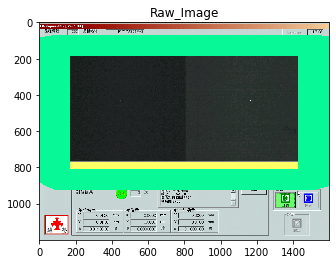

======file_two======


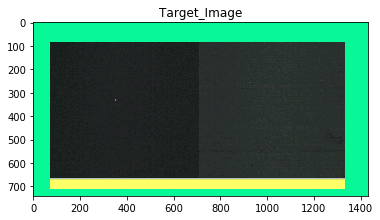

w:1093
h:331


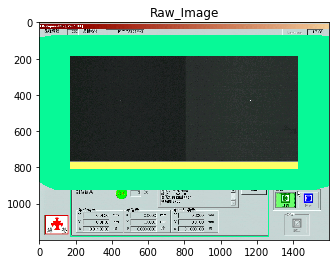

======file_one======


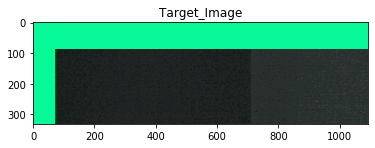

w:1431
h:741


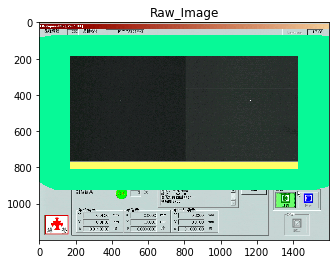

======file_two======


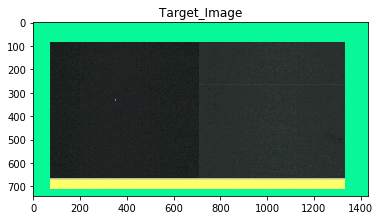

w:1093
h:331


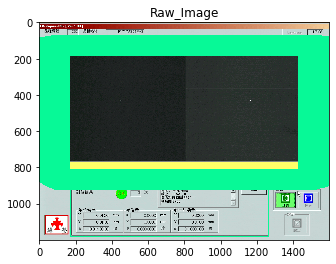

======file_one======


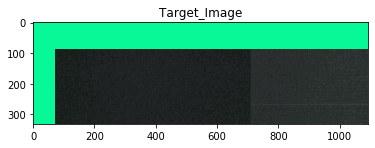

KeyboardInterrupt: 

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import datetime
start_time=time.time()
#cut frame，楨數
time_F =15 
value=0.6
#input_path   = './video/2021-05-20 08-56-30_7HAA.mp4'
#output_path  = './predict/'
#改成one、two分開

output_path= 'C:/Users/Jacky/Desktop/find_cut/20210609/'
Target= './template/'

#######################NEW##################################
output_path1='C:/Users/Jacky/Desktop/find_cut/screen/one/'
output_path2='C:/Users/Jacky/Desktop/find_cut/screen/two/'
#######################NEW##################################
# Read template folder

template_paths = []
image_paths=[]

if os.path.isdir(Target):

    for inp_file in os.listdir(Target):

        template_paths += [Target + inp_file]

else:

    template_paths += [Target]

template_paths = [inp_file for inp_file in template_paths if (inp_file[-4:] in ['.jpg', '.png', '.JPG','jpeg'])]

 


camera_port = 1
camera = cv2.VideoCapture(camera_port)
vc=cv2.VideoCapture(camera_port, cv2.CAP_DSHOW)

#調整解析度
vc.set(cv2.CAP_PROP_FRAME_WIDTH, 1600)
vc.set(cv2.CAP_PROP_FRAME_HEIGHT, 1200)
 

if vc.isOpened():#判斷是否開啟影片

    rval, video_frame = vc.read()

    print('Start....')

else:

    rval=False 

c=0

while rval:#擷取影像至結束

    rval,video_frame = vc.read()
    #多template路徑
    temp_list=['./template/Target_1.jpg', './template/Target_2.jpg']
    if(c % time_F == 0): #每隔幾幀進行擷取, 
        #temp_list=[] #inintal array
        #一個frame進來，比對所有template
        for temp in template_paths:
            ######new，使用多個temp####
            #temp_list.append(temp)
            ##########################
            image = video_frame

            img_rgb = image

            img_gray = cv2. cvtColor (img_rgb, cv2. COLOR_BGR2GRAY)
            
            
            #讀取temp特徵
            template = cv2. imread(temp,0)

            w, h = template. shape[ ::-1 ]

            print('w:{}\nh:{}'.format(w,h))

            res = cv2. matchTemplate(img_gray ,template,cv2.TM_CCOEFF_NORMED)

            threshold = value

            loc = np.where(res >=threshold)

            if np.asarray(loc[0]).size!=0: #if have object,plt image；loc tuple transfer to array
                ########讀取機台色階#######
                r,g,b=get_RGB(video_frame,300,300)
                print("R:{} G:{} B:{}".format(r,g,b))
                ########讀取機台色階#######
                
                for pt in zip (* loc [ ::- 1 ]):
                    #(影像, 頂點座標, 對向頂點座標, 顏色, 線條寬度)
                    #亮綠(7,249,151)，機台色(148,150,145)
                    cv2. rectangle (img_rgb, pt, ( pt [ 0 ] + w, pt [ 1 ] + h ) , (148,150,145) , 2 )

                #設定截圖時左上角(x,y)座標
                #注意螢幕輸入大小，左上點(104,107)，右下點(1510,751)
                x=104 #截圖左上角 x座標

                y=107  #截圖左上角 y座標

                plt.imshow (img_rgb)

                plt.title('Raw_Image')
                
#               cv2.imwrite(output_path +'Screen_'+name+'.jpg', img_rgb)

                plt.show()

                #cut object from raw image

                #初始點上面X,Y已經設定好了
                #修改截圖出來的長寬H、W
                #注意螢幕輸入大小，右下點(1510,751)
                crop_img = img_rgb[y:1510,x:751]
                #crop_img = img_rgb[y:y+h,x:x+w]

                ss=datetime.datetime.now().strftime('%Y-%m-%d %H%M%S.%f')

                #cv2.imwrite(output_path +'Target_'+ss+'.jpg', crop_img)

                plt.title('Target_Image')
                #cv2.imwrite(output_path+'Target_'+ss+'.jpg',crop_img)
                #############new，不同template存不同資料夾################
                #判斷檔名跟當前迴圈的template
                if temp == temp_list[0]:
                    print('======file_two======')
                    cv2.imwrite(output_path1+'Target_'+ss+'.jpg',crop_img)
                    
                elif temp == temp_list[1]:
                    print('======file_one======')
                    cv2.imwrite(output_path2+'Target_'+ss+'.jpg',crop_img)
                #############new，不同template存不同資料夾################
                plt.imshow(crop_img)

                plt.show()

            else:

                continue

    c=c+1       

end_time=time.time()

print('END')

print('Time:',end_time-start_time)
camera.release()

In [44]:
temp_list[0]

'./template/Target_1.jpg'

In [46]:
temp_list

['./template/Target_1.jpg', './template/Target_2.jpg']

In [45]:
temp

'./template/Target_2.jpg'

## 影像處理

分割OK
=======垂直======= [288.0, 330.0, 329.0, 287.0] =============
=======水平======= [238.0, 237.0, 272.0] =============
308.5 254.5


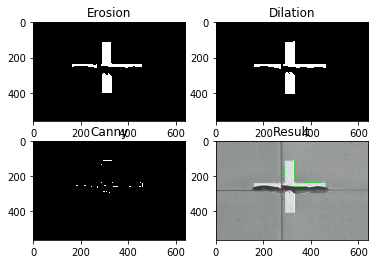

=======垂直======= [277.0, 272.0, 271.0, 279.0, 278.0, 277.0, 279.0, 272.0, 273.0] =============
=======水平======= [276.0, 285.0, 280.0, 275.0, 276.0] =============
275.0 280.0


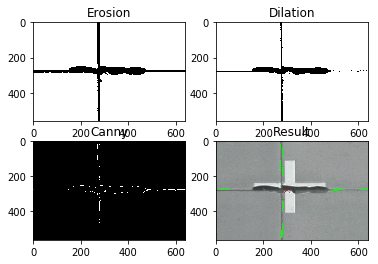

==== Bottom_left_corner ====
=======垂直======= [330.0, 365.0, 367.0, 330.0] =============
=======水平======= [233.0, 234.0, 268.0] =============
348.5 250.5


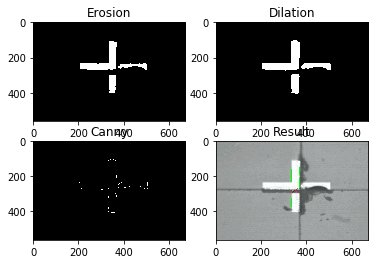

=======垂直======= [370.0, 369.0, 368.0] =============
=======水平======= [275.0, 281.0, 272.0, 294.0, 275.0] =============
369.0 283.0


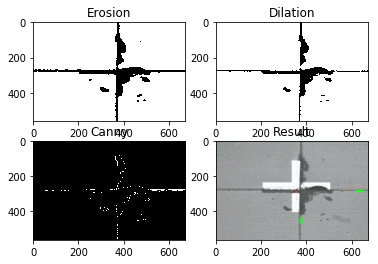

==== Bottom_right_corner ====
=======垂直======= [291.0, 334.0, 333.0, 291.0] =============
=======水平======= [284.0, 326.0, 285.0, 325.0, 319.0] =============
312.5 305.0


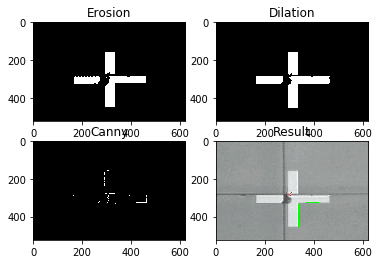

=======垂直======= [273.0, 280.0, 278.0, 272.0, 272.0, 277.0, 279.0, 273.0, 272.0] =============
=======水平======= [277.0, 281.0, 284.0, 282.0, 277.0, 281.0] =============
276.0 280.5


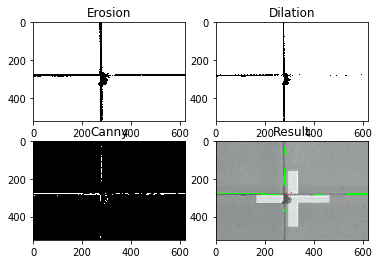

==== Upper_left_corner ====
=======垂直======= [352.0, 388.0] =============
=======水平======= [281.0, 324.0, 324.0, 316.0] =============
370.0 302.5


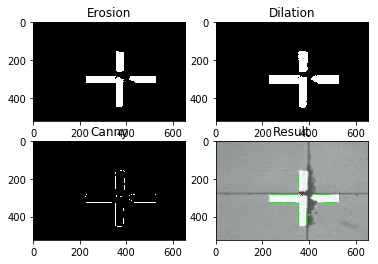

=======垂直======= [392.0, 389.0, 388.0] =============
=======水平======= [274.0, 275.0, 279.0, 281.0, 279.0, 279.0, 274.0, 279.0] =============
390.0 277.5


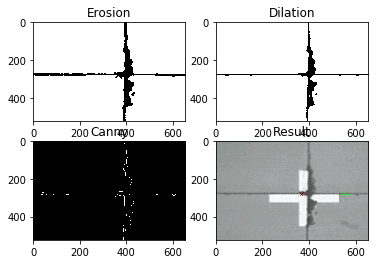

==== Upper_right_corner ====
             0
sheet_id   0.0
point_1   20.0
point_2   36.5
point_3   24.5
point_4   25.5
point_5   33.5
point_6   20.5
point_7   32.5
point_8   25.0
check      0.0
=========real===========
此片異常
          0   0
1    0.0000  NG
2  483.9960  OK
3  553.2927  OK
4  502.8951  OK
5  507.0949  OK
6  540.6933  OK
7  486.0959  OK
8  536.4935  OK
Time: 3.5436346530914307


In [3]:
#載入寫好的外部程式，(名稱不能有'_'，要放同一個資料夾下)
import CuttingLine as CL
import time
start_time=time.time()

path='C:\\Users\\2102048\\pythonCV\\'
#path='C:\\Users\\Jacky\\Desktop\\'
# #測試
# CL.test_function()
# #過濾
# CL.use_find_CuttingLine(path+'find_cut\\screen\\',path+'find_cut\\temp')
# time.sleep(1)
#分邊
CL.precutting(path+'find_cut\\temp\\',path+'find_cut\\cuttemp\\')
time.sleep(1)
#計算
CL.x_ray_cutting(path+'find_cut\\cuttemp\\',path+'find_cut\\cutresult\\')
end_time=time.time()
print('Time:',end_time-start_time)

## 重建資料夾

In [11]:
#清空one、two 
import CuttingLine as CL
import time
#path='C:\\Users\\2102048\\pythonCV\\'
path='C:\\Users\\Jacky\\Desktop\\'
CL.resetfile(path+'find_cut\\screen\\one')
time.sleep(2)
CL.resetfile(path+'find_cut\\screen\\two')

In [ ]:
#載入寫好的外部程式，(名稱不能有'_'，要放同一個資料夾下)
import CuttingLine as CL
#過濾
CL.use_find_CuttingLine('C:\\Users\\Jacky\\Desktop\\find_cut\\Screen\\','C:\\Users\\Jacky\\Desktop\\find_cut\\temp')
time.sleep(1)
#分邊
CL.precutting('C:\\Users\\Jacky\\Desktop\\find_cut\\temp\\','C:\\Users\\Jacky\\Desktop\\find_cut\\cut_temp\\')
time.sleep(1)
# #計算
# CL.x_ray_cutting('C:\\Users\\Jacky\\Desktop\\find_cut\\cut_temp\\','C:\\Users\\Jacky\\Desktop\\find_cut\\cut_result\\')

In [5]:
video_frame.shape

(1200, 1600, 3)

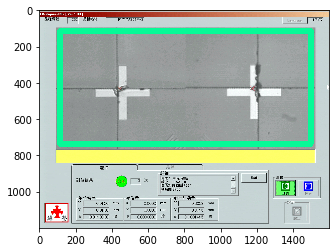

In [67]:
output_path='C:\\Users\\Jacky\\Desktop\\find_cut\\Screen\\'
plt.imshow(image)
cv2.imwrite(output_path +'Target_'+'.jpg', image)
plt.show()